In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input

Using TensorFlow backend.


In [2]:
# !ls 

In [3]:
train_path = "original_data/training"
validation_path = "original_data/validation"
test_path = "original_data/test"

In [4]:
dimentions = (299, 299)
batch_size = 64

n_class = 2

In [5]:
train_datagen  = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect'
)

In [6]:
valid_datagen  = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect'
)

In [7]:
test_datagen  = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size=dimentions,
    batch_size=batch_size
)

Found 717 images belonging to 2 classes.


In [9]:
validation_generator = valid_datagen.flow_from_directory(
    validation_path, 
    target_size=dimentions,
    batch_size=batch_size
)

Found 239 images belonging to 2 classes.


In [10]:
test_generator = test_datagen.flow_from_directory(
    test_path, 
    target_size=dimentions,
    batch_size=batch_size
)

Found 239 images belonging to 2 classes.


In [12]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input
from keras.models import Model

base_model = InceptionV3(
    weights='imagenet', 
    include_top=False,
)

x = base_model.output 
x = GlobalAveragePooling2D()(x) 
x = Dense(1024, activation='relu')(x) 
predictions = Dense(n_class, activation='softmax')(x)    
model = Model(inputs=base_model.input, outputs=predictions)

In [13]:
from keras import metrics

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [14]:
from keras.callbacks import ModelCheckpoint  

# !mkdir saved_models

model_file = 'saved_models/agument_weights.best.InceptionV3.hdf5'
checkpointer = ModelCheckpoint(filepath=model_file, 
                               verbose=1, save_best_only=True)

In [15]:
epochs = 10

In [16]:
train_history = model.fit_generator(train_generator, 
                                    validation_data=validation_generator, 
                                    epochs=epochs, 
                                    callbacks=[checkpointer],
                                    steps_per_epoch=train_generator.samples // batch_size, 
                                    validation_steps=validation_generator.samples // batch_size
                                   )

Epoch 1/10
11/11 [==============================] - 155s 14s/step - loss: 0.4420 - acc: 0.8594 - val_loss: 0.1899 - val_acc: 0.9427

Epoch 00001: val_loss improved from inf to 0.18987, saving model to saved_models/agument_weights.best.InceptionV3.hdf5
Epoch 2/10
11/11 [==============================] - 59s 5s/step - loss: 0.1371 - acc: 0.9391 - val_loss: 0.3252 - val_acc: 0.9029

Epoch 00002: val_loss did not improve from 0.18987
Epoch 3/10
11/11 [==============================] - 104s 9s/step - loss: 0.1080 - acc: 0.9520 - val_loss: 3.4231 - val_acc: 0.4571

Epoch 00003: val_loss did not improve from 0.18987
Epoch 4/10
11/11 [==============================] - 111s 10s/step - loss: 0.1052 - acc: 0.9477 - val_loss: 0.2911 - val_acc: 0.8743

Epoch 00004: val_loss did not improve from 0.18987
Epoch 5/10
11/11 [==============================] - 111s 10s/step - loss: 0.1139 - acc: 0.9628 - val_loss: 1.6853 - val_acc: 0.6979

Epoch 00005: val_loss did not improve from 0.18987
Epoch 6/10
11/1

In [17]:
train_history.history

{'val_loss': [0.18987098832925162,
  0.3251838976996286,
  3.4231065014430455,
  0.2910911714179175,
  1.6852703889211018,
  0.8521536266803742,
  2.753476799556187,
  0.18712752623217446,
  0.3066623906294505,
  3.210052168709891],
 'val_acc': [0.9427083333333334,
  0.9028571469443185,
  0.4571428595270429,
  0.8742857183728899,
  0.6979166666666666,
  0.8000000034059797,
  0.44571428877966746,
  0.897142859186445,
  0.9114583333333334,
  0.7485714221000671],
 'loss': [0.4419545741243796,
  0.13467427647771002,
  0.10602951079470092,
  0.10380603836287401,
  0.11791110888214791,
  0.09511491752145484,
  0.09780564346275139,
  0.14039318799789977,
  0.07871628779301827,
  0.1172281437957086],
 'acc': [0.859375,
  0.9402756509335446,
  0.9540581930468678,
  0.9494640123424267,
  0.9601837672281777,
  0.9678407352514691,
  0.9509954059105737,
  0.9448698316379857,
  0.9632465543644717,
  0.9479326187742797]}

In [18]:
import matplotlib.pyplot as plt

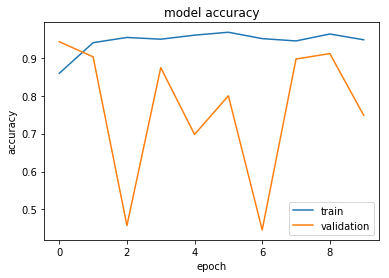

In [19]:
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

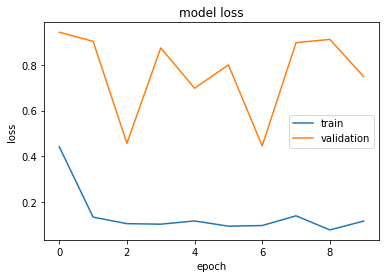

In [20]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [21]:
model.load_weights(model_file)
tesr_result = model.evaluate_generator(test_generator, steps=10)

In [22]:
tesr_result

[0.38100816764355494, 0.8333333356939133]

In [23]:
predict = model.predict_generator(test_generator,steps = 10)

In [24]:
import cv2
import numpy as np


from keras.preprocessing import image
# img = cv2.imread(path_to_one_file)
# img = np.array([img]).reshape((1, 3, 299, 299))

def to_tensor(img_path): 
    img = image.load_img(img_path, target_size=(299, 299))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255. 
    
    return img_tensor

In [25]:
def make_predict(img_path): 
    class_dic = {}
    for k, v in test_generator.class_indices.items():
        class_dic[v] = k
    
    
    y_prob = model.predict(to_tensor(img_path))
    y_classes = y_prob.argmax(axis=-1)
    return class_dic[y_classes[0]]

In [26]:
img_path = "original_data/test/benign/ISIC_0004472.jpg"
make_predict(img_path)

'benign'

In [27]:
class_dic = dict(test_generator.class_indices)
print(class_dic)

one_hot = {}
for k, v in test_generator.class_indices.items():
    one_hot[v] = k
print(one_hot)

{'benign': 0, 'malignant': 1}
{0: 'benign', 1: 'malignant'}


In [28]:
from os import listdir 

y_true = [] 
y_pred = []

class_name = "benign"
for img in listdir("original_data/test/{}/".format(class_name)):
    img_path = "original_data/test/{}/{}".format(class_name, img)
    pred = make_predict(img_path)
    
    y_true.append(class_name)
    y_pred.append(pred)
    
class_name = "malignant"
for img in listdir("original_data/test/{}/".format(class_name)):
    img_path = "original_data/test/{}/{}".format(class_name, img)
    pred = make_predict(img_path)
    
    y_true.append(class_name)
    y_pred.append(pred)
    

In [29]:
len(y_true) == len(y_pred)

True

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred, labels=["benign", "malignant"])

In [31]:
import pandas as pd
df_cm = pd.DataFrame(cm, ["benign", "malignant"], ["benign", "malignant"])

In [32]:
import seaborn as sn

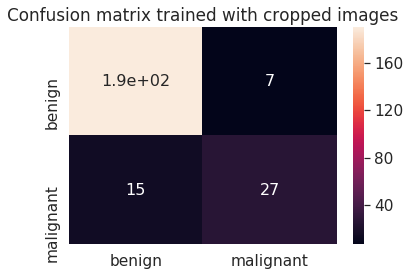

In [33]:
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}).set_title("Confusion matrix trained with cropped images")# font size
plt.show()

In [34]:
from sklearn.metrics import f1_score
y_true_01 = [class_dic[p] for p in y_true]
y_pred_01 = [class_dic[p] for p in y_pred]
f1_score(y_true_01, y_pred_01)

0.7105263157894737

In [35]:
from sklearn.metrics import recall_score
recall_score(y_true_01, y_pred_01) 

0.6428571428571429

In [36]:
from sklearn.metrics import precision_score
precision_score(y_true_01, y_pred_01) 

0.7941176470588235

In [51]:
# y_pred_01